In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
it=pd.read_csv('interstellar_travel.csv')
it

,Unnamed: 0,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,0,14,Female,Colonist,Business,Gliese 581,Cunningham Mountains,1.09,11.0,5,Tourism,Warp Drive,828.949275,2023-09-17,2025-01-07,Other,No,9,105.0
1,1,22,Male,Tourist,Economy,Alpha Centauri,Hayes Trace,5.70,23.0,0,Research,Solar Sailing,488.469135,2023-03-31,2025-12-26,Other,No,3,102.0
2,2,62,Female,Businessperson,Luxury,Alpha Centauri,Anna Port,0.37,4.0,1,Tourism,Ion Thruster,183.745881,2022-05-19,2025-01-04,Nothing,Yes,5,100.0
3,3,21,Female,Colonist,Economy,Lalande 21185,Henry Ville,0.32,23.0,1,Tourism,Warp Drive,358.754000,2023-04-13,2024-02-09,Nothing,No,4,108.0
4,4,42,Male,Explorer,Luxury,Exotic Destination 10,Graves Mall,6.17,42.0,1,Colonization,Ion Thruster,3073.759920,2023-06-12,2024-03-15,Special Meal,No,6,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547563,547563,72,Male,Scientist,Economy,Zeta II Reticuli,Peterson Pike,0.29,41.0,1,Research,Warp Drive,274.456298,2024-01-22,2024-10-31,Special Meal,No,1,100.0
547564,547564,23,Male,Tourist,Business,Exotic Destination 7,Ronald Row,27.61,4.0,2,Business,Warp Drive,2784.565350,2022-11-09,2024-07-09,Special Meal,Yes,11,115.0
547565,547565,6,Female,Colonist,Business,Proxima Centauri,John Lane,4.04,11.0,0,Other,Solar Sailing,2640.288420,2023-07-02,2024-07-24,Window Seat,No,7,102.0
547566,547566,21,Female,Other,Business,Alpha Centauri,Elizabeth Mountain,4.20,13.0,0,Tourism,Warp Drive,420.132116,2022-12-09,2025-12-06,Extra Space Suit,No,12,105.0


In [3]:
it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547568 entries, 0 to 547567
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             547568 non-null  int64  
 1   Age                                    547568 non-null  int64  
 2   Gender                                 547568 non-null  object 
 3   Occupation                             547568 non-null  object 
 4   Travel Class                           547568 non-null  object 
 5   Destination                            547568 non-null  object 
 6   Star System                            547568 non-null  object 
 7   Distance to Destination (Light-Years)  547568 non-null  float64
 8   Duration of Stay (Earth Days)          547568 non-null  float64
 9   Number of Companions                   547568 non-null  int64  
 10  Purpose of Travel                      547568 non-null  

In [4]:
it[['Booking Date','Departure Date']]=it[['Booking Date','Departure Date']].apply(pd.to_datetime)

In [5]:
it.duplicated().any()


False

In [6]:
it.isnull().any()

Unnamed: 0                               False
Age                                      False
Gender                                   False
Occupation                               False
Travel Class                             False
Destination                              False
Star System                              False
Distance to Destination (Light-Years)    False
Duration of Stay (Earth Days)            False
Number of Companions                     False
Purpose of Travel                        False
Transportation Type                      False
Price (Galactic Credits)                 False
Booking Date                             False
Departure Date                           False
Special Requests                         False
Loyalty Program Member                   False
Month                                    False
Customer Satisfaction Score              False
dtype: bool

In [7]:
age_values=it['Age'].unique()
age_values.sort()
age_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

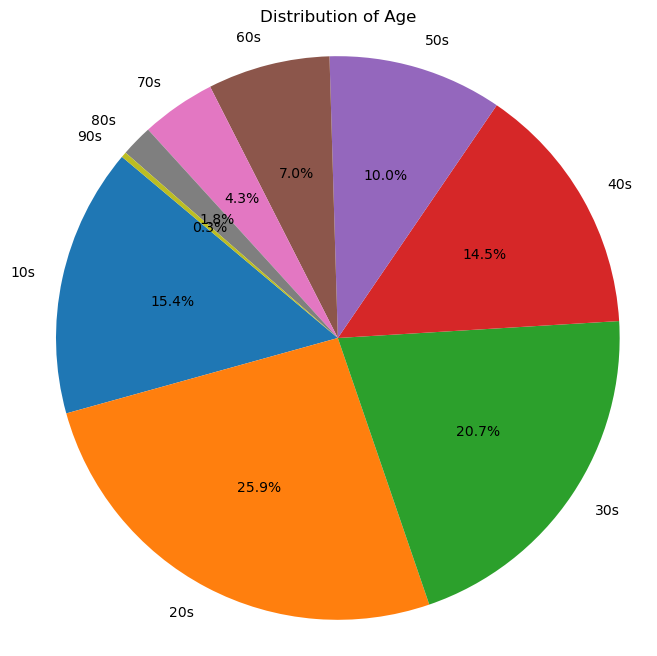

In [10]:
age_categories={'10s':range(0,10),'20s':range(20,30),'30s':range(30,40),'40s':range(40,50),'50s':range(50,60),'60s':range(60,70),'70s':range(70,80),'80s':range(80,90),'90s':range(90,100)}
category_counts={category:0 for category in age_categories}

for age in it['Age']:
    for category ,age_range in age_categories.items():
        if age in age_range:
            category_counts[category]+=1
            break
            
plt.figure(figsize=(8, 8))
labels = list(category_counts.keys())
sizes = list(category_counts.values())

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age')
plt.axis('equal')  
plt.show()

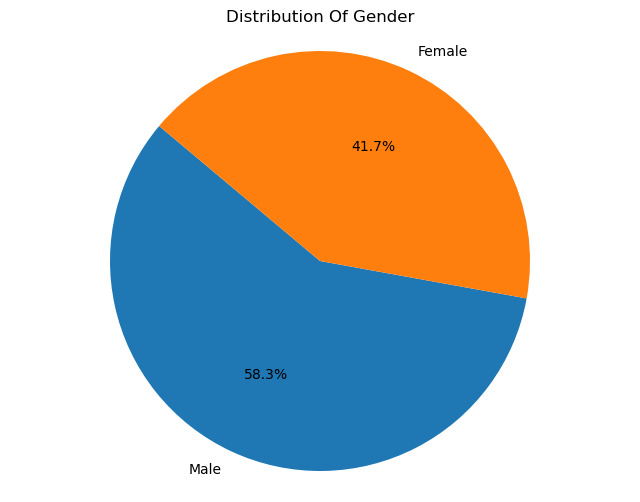

In [12]:
purpose_counts = it['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution Of Gender')
plt.axis('equal')  
plt.show()

In [13]:
it['Occupation'].unique()


array(['Colonist', 'Tourist', 'Businessperson', 'Explorer', 'Other',
       'Scientist'], dtype=object)

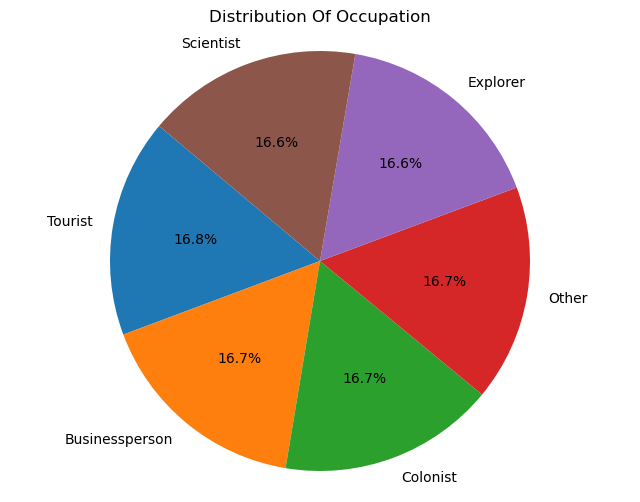

In [14]:
purpose_counts = it['Occupation'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution Of Occupation')
plt.axis('equal')  
plt.show()

In [15]:
it['Travel Class'].unique()


array(['Business', 'Economy', 'Luxury'], dtype=object)

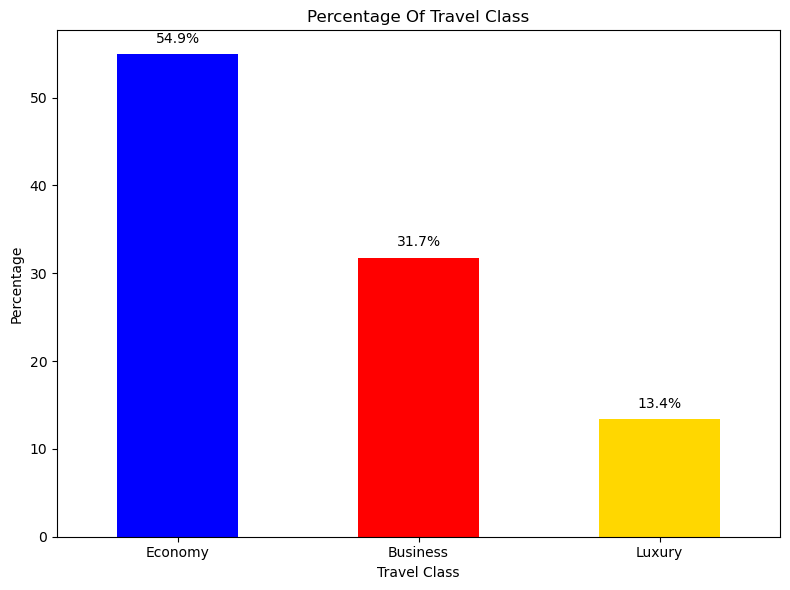

In [18]:
loyalty_counts = it['Travel Class'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
color_dict = {'Economy': 'blue', 'Business': 'red', 'Luxury': 'gold'}
bars = loyalty_counts.plot(kind='bar', color=[color_dict[x] for x in loyalty_counts.index]) 
plt.title('Percentage Of Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 

for index, value in enumerate(loyalty_counts):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [19]:
it['Purpose of Travel'].unique()


array(['Tourism', 'Research', 'Colonization', 'Business', 'Other'],
      dtype=object)

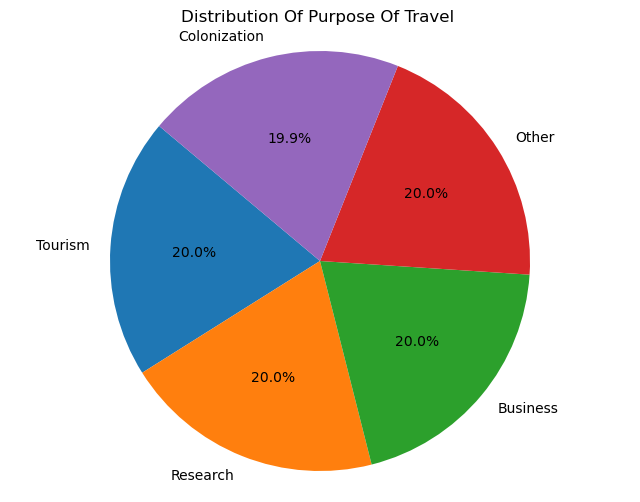

In [20]:
purpose_counts = it['Purpose of Travel'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution Of Purpose Of Travel ')
plt.axis('equal')  
plt.show()

In [21]:
it['Year'] = it['Booking Date'].dt.year
year_counts = it['Year'].value_counts()
year_counts

Year
2023    273838
2022    255701
2024     18029
Name: count, dtype: int64

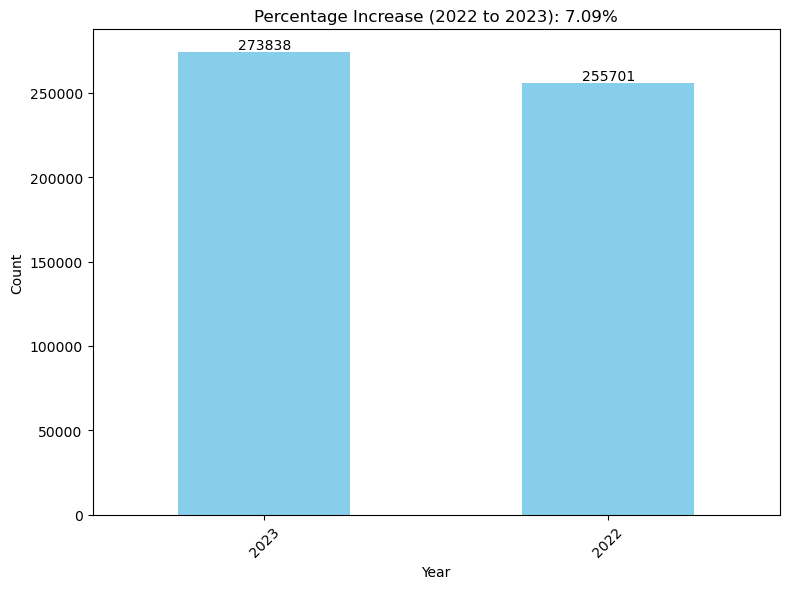

In [24]:
it.loc[:,'Year'] = it['Booking Date'].dt.year
it = it[it['Year'] != 2024]
year_counts = it['Year'].value_counts()


plt.figure(figsize=(8, 6))
bars = year_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(year_counts):
     plt.text(index, value+1 , str(value), ha='center', va='bottom')

percentage_increase = ((year_counts[2023] - year_counts[2022]) / year_counts[2022]) * 100
plt.title('Percentage Increase (2022 to 2023): {:.2f}%'.format(percentage_increase))

plt.tight_layout()
plt.show()

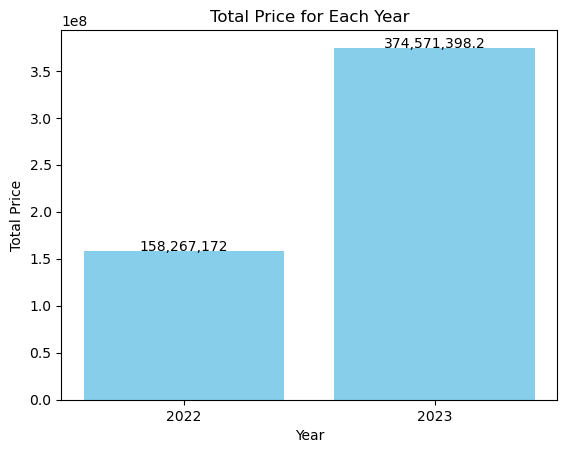

In [27]:
it.loc[:,'Year'] = it['Booking Date'].dt.year
it = it[it['Year'] != 2024]

unique_years = it['Year'].unique()
sums_by_year = {}

for year in unique_years:
    sum_price = it[it['Year'] == year]['Price (Galactic Credits)'].sum()
    sums_by_year[year] = sum_price
    
plt.bar(sums_by_year.keys(), sums_by_year.values(), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.title('Total Price for Each Year')

for year, price in sums_by_year.items():
        formatted_price = "{:,.1f}".format(price).rstrip('0').rstrip('.')
        plt.text(year, price + 5, formatted_price, ha='center')

plt.xticks(list(sums_by_year.keys()))
plt.show()


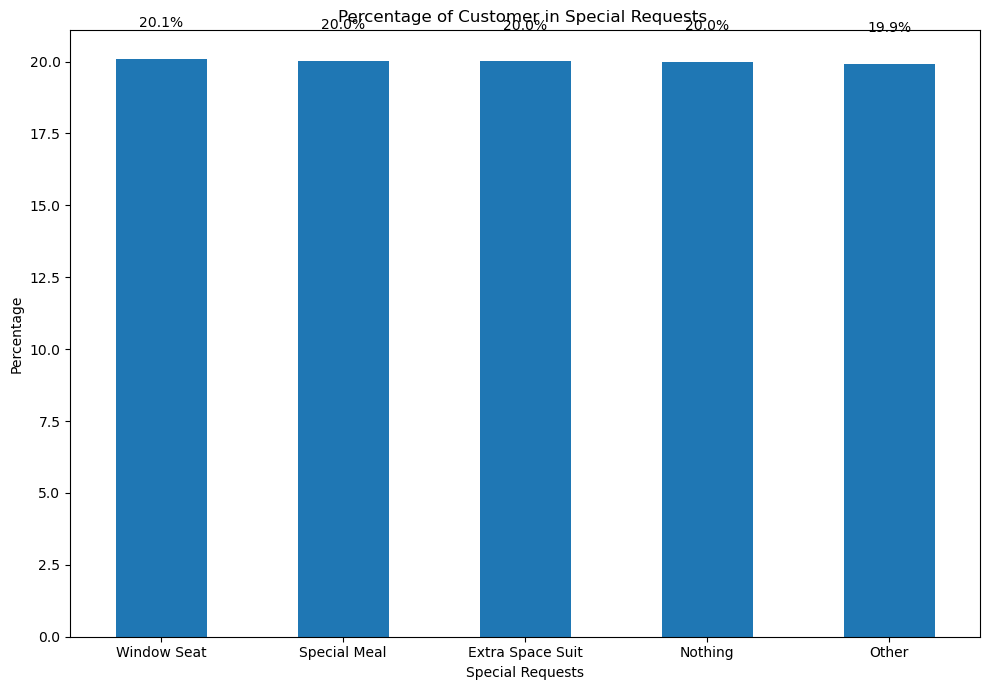

In [28]:
loyalty_counts = it['Special Requests'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 7))
bars = loyalty_counts.plot(kind='bar')

plt.title('Percentage of Customer in Special Requests ')
plt.xlabel('Special Requests')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 

for index, value in enumerate(loyalty_counts):
         plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

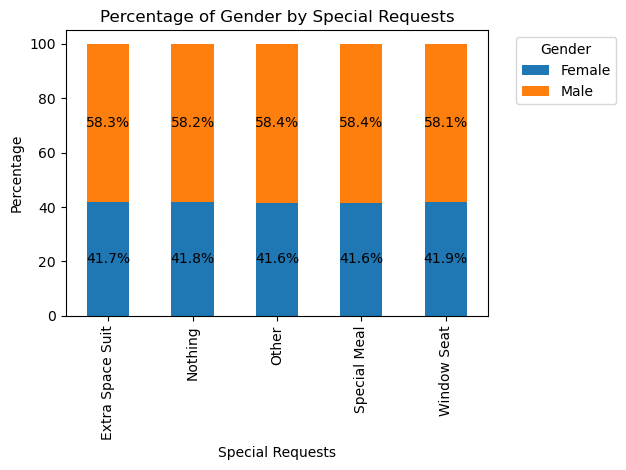

In [32]:
gender_counts = it.groupby('Special Requests')['Gender'].value_counts(normalize=True) * 100

sr_g = gender_counts.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Special Requests')
plt.ylabel('Percentage')
plt.title('Percentage of Gender by Special Requests')

for p in sr_g.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()    
    sr_g.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

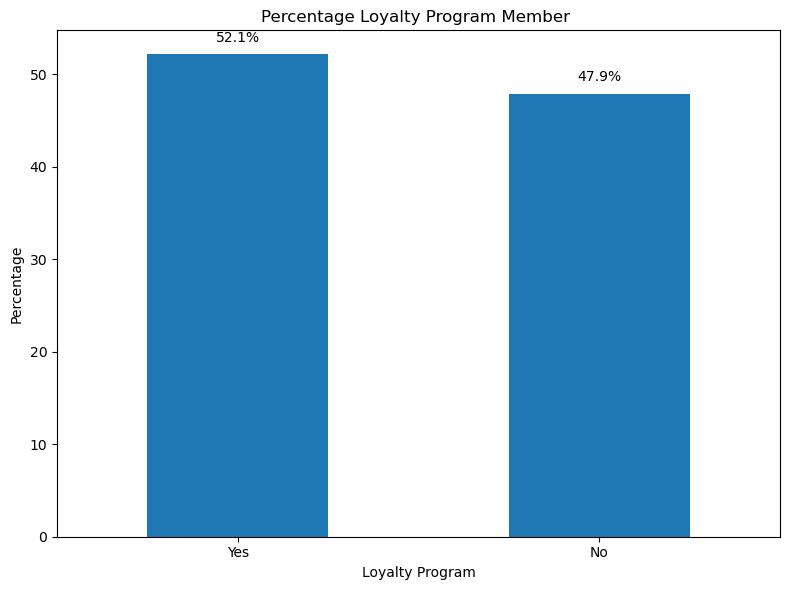

In [33]:
loyalty_counts = it['Loyalty Program Member'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
bars = loyalty_counts.plot(kind='bar')

plt.title('Percentage Loyalty Program Member ')
plt.xlabel('Loyalty Program')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 

for index, value in enumerate(loyalty_counts):
         plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

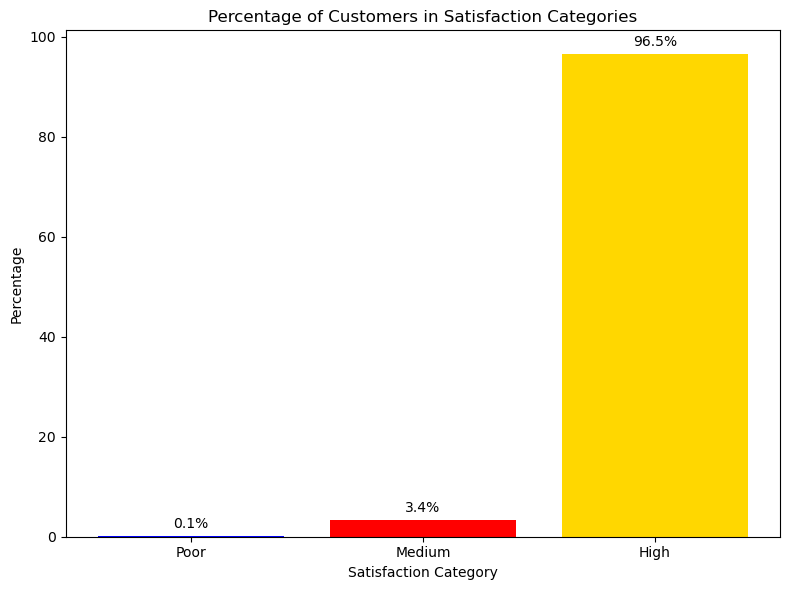

In [36]:
customer_satisfaction_score_cate= {'Poor': range(32, 51), 'Medium': range(50, 75), 'High': range(75, 116)}
customer_satisfaction_score_count = {satisfaction: 0 for satisfaction in customer_satisfaction_score_cate}
total_count = 0

customer_satisfaction_scores = it['Customer Satisfaction Score']
for customer_satisfaction in customer_satisfaction_scores:
    satisfaction_int = int(customer_satisfaction)
    for satisfaction, score_range in customer_satisfaction_score_cate.items():
        if satisfaction_int in score_range:
            customer_satisfaction_score_count[satisfaction] += 1
            total_count += 1

plt.figure(figsize=(8, 6))
color_dict = {'Poor': 'blue', 'Medium': 'red', 'High': 'gold'}
percentages = [(count / total_count) * 100 for count in customer_satisfaction_score_count.values()]
bars = plt.bar(customer_satisfaction_score_cate.keys(), percentages, color=[color_dict[x] for x in customer_satisfaction_score_cate.keys()]) 
plt.title('Percentage of Customers in Satisfaction Categories')
plt.xlabel('Satisfaction Category')
plt.ylabel('Percentage')

for index, percentage in enumerate(percentages):
    plt.text(index, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
